In [15]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from image_manipulation import *

In [16]:
RANKS = ('2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A')
SUITS = ('clubs', 'diamonds', 'hearts', 'spades')

In [17]:
def process_ranks(rank_list):
    samples = []
    labels = []
    for i, feature_folder in enumerate(rank_list):
        image_names = next(os.walk(feature_folder))[2]
        for image_name in image_names:
            image = cv2.imread(f'{feature_folder}/{image_name}', cv2.IMREAD_GRAYSCALE)
            white_mask = create_white_mask(image)
            contour = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]
            corners = find_contour_corners(contour)
            if corners is None:
                print(f'sample skipped {feature_folder}/{image_name}')
                continue
            inverted = 255 - image
            birds_eye = create_birds_eye_view(inverted, corners, (500, 700))
            rank_crop = birds_eye[0:110, 0:60] # 60x110
            samples.append(rank_crop)
            labels.append(i)
    return np.array(samples), np.array(labels)

In [18]:
def process_suits(suit_list):
    samples = []
    labels = []
    for i, feature_folder in enumerate(suit_list):
        image_names = next(os.walk(feature_folder))[2]
        for image_name in image_names:
            image = cv2.imread(f'{feature_folder}/{image_name}', cv2.IMREAD_GRAYSCALE)
            white_mask = create_white_mask(image)
            contour = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]
            corners = find_contour_corners(contour)
            if corners is None:
                print(f'sample skipped {feature_folder}/{image_name}')
                continue
            inverted = 255 - image
            birds_eye = create_birds_eye_view(inverted, corners, (500, 700))
            suit_crop = birds_eye[110:180, 0:60] # 60x70
            samples.append(suit_crop)
            labels.append(i)
    return np.array(samples), np.array(labels)

In [19]:
rank_samples, rank_labels = process_ranks(RANKS)

In [20]:
print(rank_samples.shape)
print(rank_labels.shape)

(41600, 110, 60)
(41600,)


0
2


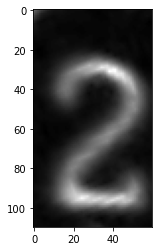

In [21]:
plt.imshow(rank_samples[0], cmap='gray')
print(rank_labels[0])
print(RANKS[rank_labels[0]])

In [22]:
suit_samples, suit_labels = process_suits(SUITS)

In [23]:
print(suit_samples.shape)
print(suit_labels.shape)

(12800, 70, 60)
(12800,)


0
clubs


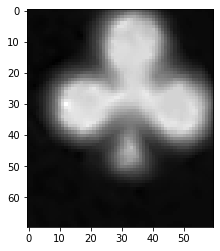

In [24]:
plt.imshow(suit_samples[0], cmap='gray')
print(suit_labels[0])
print(SUITS[suit_labels[0]])

In [25]:
np.save('rank_samples.npy', rank_samples)

In [26]:
np.save('rank_labels.npy', rank_labels)

In [27]:
np.save('suit_samples.npy', suit_samples)

In [28]:
np.save('suit_labels.npy', suit_labels)